## A Class that handles all processes, we can go down to check each process in-depth, (Not Required but it is an additional point)

In [1]:
%%writefile generate_pos_graph.py
import string
import networkx as nx
import re
import matplotlib.pyplot as plt
import spacy

class GeneratePosGraph:
    def __init__(self):
        self.extractor = spacy.load("en_core_web_sm")
        self.graph = nx.Graph()
    
    
    def clean_text(self, text):
        punctuation = string.punctuation
        text = text.lower()
        text = text.translate(str.maketrans("", "", punctuation))
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    
    def pos_extractor(self, text):
        text = self.clean_text(text)
        doc = self.extractor(text)

        return doc
    
    def add_node2graph(self, text):
        doc = self.pos_extractor(text)
        all_pos = set([token.pos_ for token in doc])
        for pos in all_pos:
            self.graph.add_node(pos, color="pink")
        for token in doc:
            self.graph.add_node(token.text, color='cyan')
            self.graph.add_edge(token.text, token.pos_, relation="IS")
        
    def generate_graph(self, text:str):
        plt.figure(figsize=(12,12))
        self.add_node2graph(text)
        pos = nx.spring_layout(self.graph, k=.35)
        node_colors = [self.graph.nodes[node]["color"] for node in graph.nodes]

        nx.draw(self.graph,pos,
            with_labels=True,node_color=node_colors,
            node_size=800,font_size=10,font_color="black")

        edge_labels = nx.get_edge_attributes(self.graph, "relation")
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)

        plt.savefig("graph_image.png", format="PNG")

Overwriting generate_pos_graph.py


## NoteBook Code

In [ ]:
import string
import networkx as nx
import re
import matplotlib.pyplot as plt
import spacy

In [85]:
article_text = """"
What are multimodal LLMs? As hinted at in the introduction, multimodal LLMs are large language models capable of processing multiple types of inputs, where each "modality" refers to a specific type of data—such as text (like in traditional LLMs), sound, images, videos, and more. For simplicity, we will primarily focus on the image modality alongside text inputs.
"""

In [ ]:
punctuation = string.punctuation
def clean_text(text):
    text = text.lower()

    text = text.translate(str.maketrans("", "", punctuation))

    text = re.sub(r'\s+', ' ', text).strip()

    return text

article_text = clean_text(article_text)
print(article_text)

In [97]:
extractor = spacy.load("en_core_web_sm")

doc = extractor(article_text)
print(f"Number of Extracted token is {len(doc)}")
for token in doc:
    print(f"Word: {token.text}, POS: {token.pos_}")
    break

all_pos = set([token.pos_ for token in doc])

Number of Extracted token is 59
Word: what, POS: PRON


In [ ]:
graph = nx.Graph()

for pos in all_pos:
    graph.add_node(pos, color="pink")

for token in doc:
    graph.add_node(token.text, color='cyan')
    graph.add_edge(token.text, token.pos_, relation="IS")

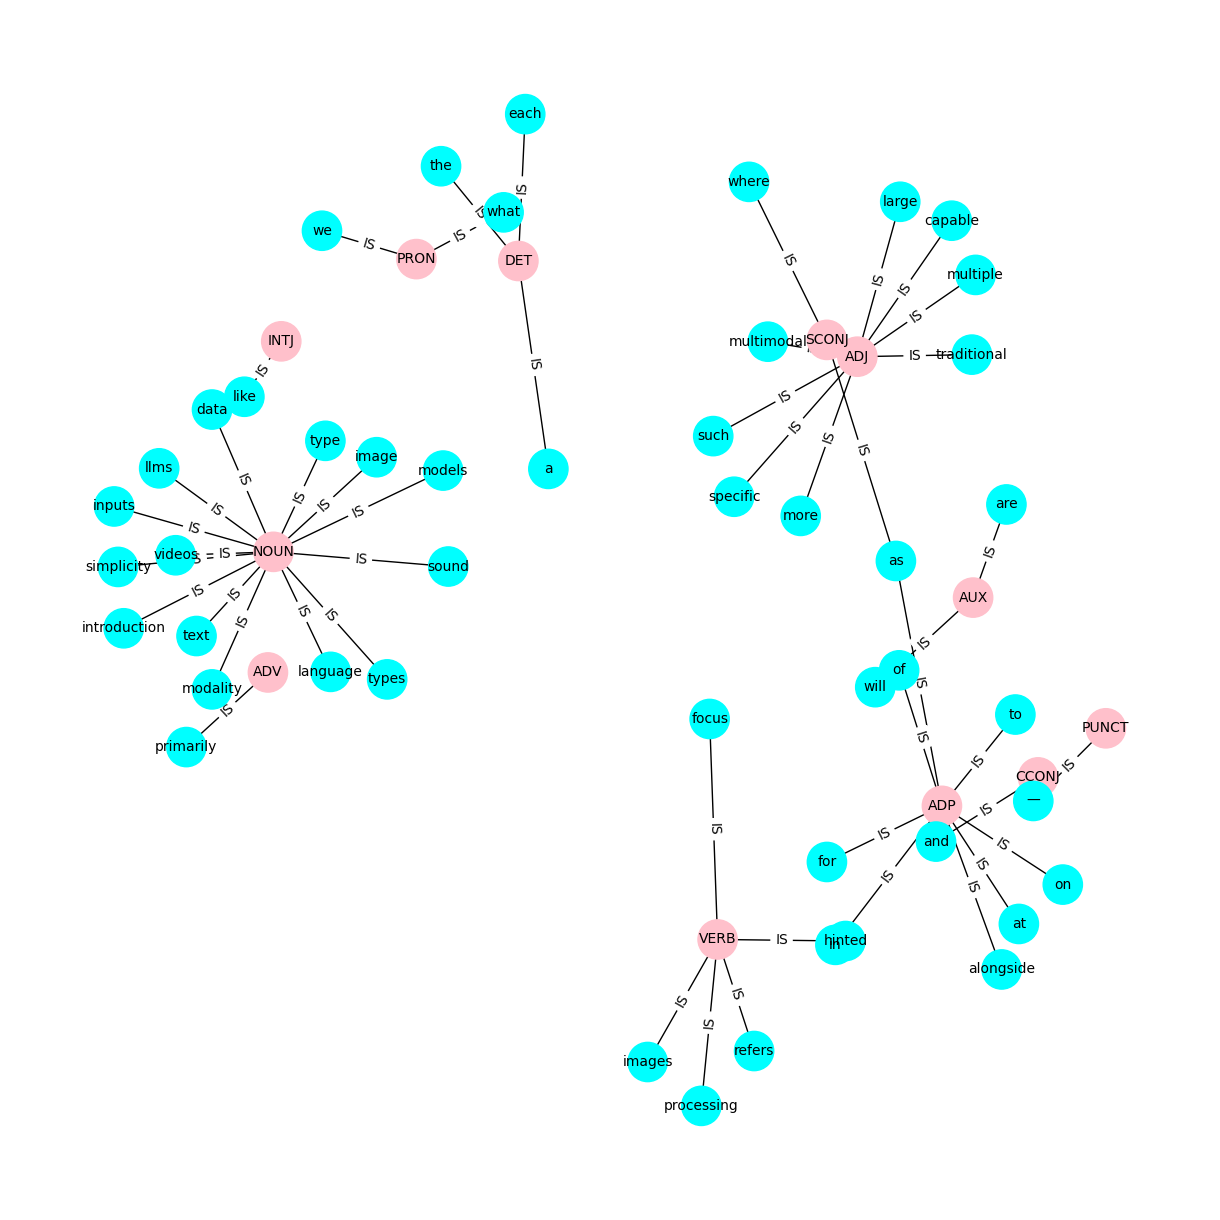

In [83]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(graph, k=.35)
node_colors = [graph.nodes[node]["color"] for node in graph.nodes]

nx.draw(
    graph,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=800,
    font_size=10,
    font_color="black",
)
edge_labels = nx.get_edge_attributes(graph, "relation")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

plt.show()